# 🇨🇦 Analysis of Canadian Residential Rental Prices using Linear Regression Models 

🇨🇦 This notebook analyzes rental prices in Canada using Linear Regression.


## **Dataset Overview and Introduction**

The dataset used for this analysis provides historical rental price data for various cities contained in all Provinces across Canada. It contains 69,532 records and covers rental trends over a span of 37 years (1987-2024).

### **Objective(s):**

The primary objective of this notebook is to predict rental prices in Canada using Regression Analysis. By leveraging historical rent data from 1987 to 2024, the model aims to:
- Identify key factors influencing rental prices, such as province, city, year, and unit type.
- Build a predictive model using Linear Regression to estimate rent prices based on available features.
-Evaluate model performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score.
- Analyze prediction accuracy to assess how well the model generalizes to new rental price data.

---

### **Data Overview:**
- **Total Entries:** 69,532
- **Features:**
  - **Province, City, Year, Average Rent, Unit Type, Unit Description**
- **Target Variable:** Rent prices categorized into two groups (High vs. Low)

---

### **Feature Breakdown**

The dataset consists of **six columns**:

1. **Province** - The Canadian province where the rental data was collected.
2. **City** - The specific city in the province.
3. **Year** - The year when the rental price data was recorded. ( 1987 - 2024)
4. **AverageRent** - The average rent price in the respective city for the given year.
5. **UnitType** - The type of rental unit.
6. **UnitDescription** - A standardized description of the general building layout for each "unit types".

---


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
# Load the dataset
df = pd.read_csv("Canada_Rent_1987-2024_NO ZEROS.csv", encoding="latin1")

In [14]:
# Display basic info
df.head()

,Province,City,Year,AverageRent,UnitType,UnitDescription
0,Newfoundland and Labrador,Corner Brook,1987,480,Two bedroom units,Apartment structures of six units and over
1,Newfoundland and Labrador,Gander,1987,370,One bedroom units,Apartment structures of six units and over
2,Newfoundland and Labrador,Gander,1987,414,Two bedroom units,Apartment structures of six units and over
3,Newfoundland and Labrador,Gander,1987,414,Three bedroom units,Apartment structures of six units and over
4,Newfoundland and Labrador,Labrador City,1987,254,One bedroom units,Apartment structures of six units and over


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69532 entries, 0 to 69531
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Province         69532 non-null  object
 1   City             69532 non-null  object
 2   Year             69532 non-null  int64 
 3   AverageRent      69532 non-null  int64 
 4   UnitType         69532 non-null  object
 5   UnitDescription  69532 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,69532.0,2007.715412,9.921874,1987.0,1999.0,2008.0,2016.0,2024.0
AverageRent,69532.0,680.042757,302.502535,169.0,464.0,610.0,820.0,2961.0


## Data Cleaning & Processing
- Check for missing data
- Check for duplicated values
- Rent pices will then be categorized into two groups and categorical features will then encoded.

In [18]:
# Check for missing values
df.isnull().sum()

Province           0
City               0
Year               0
AverageRent        0
UnitType           0
UnitDescription    0
dtype: int64

In [20]:
# Check for duplicated values 
df.duplicated().sum()

np.int64(0)

In [21]:
df.shape

(69532, 6)

### Feature Engineering
Selecting relevant columns for the regression model.

In [22]:
features = ["Province", "City", "Year", "UnitType"]
target = "AverageRent"

# One-hot encoding categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_data = encoder.fit_transform(df[features[:-1]])
categorical_columns = encoder.get_feature_names_out(features[:-1])

In [23]:
df_encoded = pd.DataFrame(categorical_data, columns=categorical_columns)
df_encoded[target] = df[target].values
display(df_encoded.head())

,Province_ Alberta part,Province_ British Columbia,Province_ Manitoba,Province_ New Brunswick,Province_ New Brunswick part,Province_ Newfoundland and Labrador,Province_ Northwest Territories,Province_ Nova Scotia,Province_ Ontario,Province_ Ontario part,...,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024,AverageRent
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,480
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,370
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254


### Modeling the Data
Dividing the dataset into training and testing sets.

In [24]:
X = df_encoded.drop(columns=[target])
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing numerical data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Training the Regression Model
Using Linear Regression to predict rental prices.

In [25]:
# Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


### Model Performance Metrics
Evaluating the regression model with MAE, MSE, RMSE, and R².

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 125.72837603874476
MSE: 28167.25325711654
RMSE: 167.8310259073588
R² Score: 0.6973636021888793


### Visualization
Plotting actual vs. predicted rent prices.

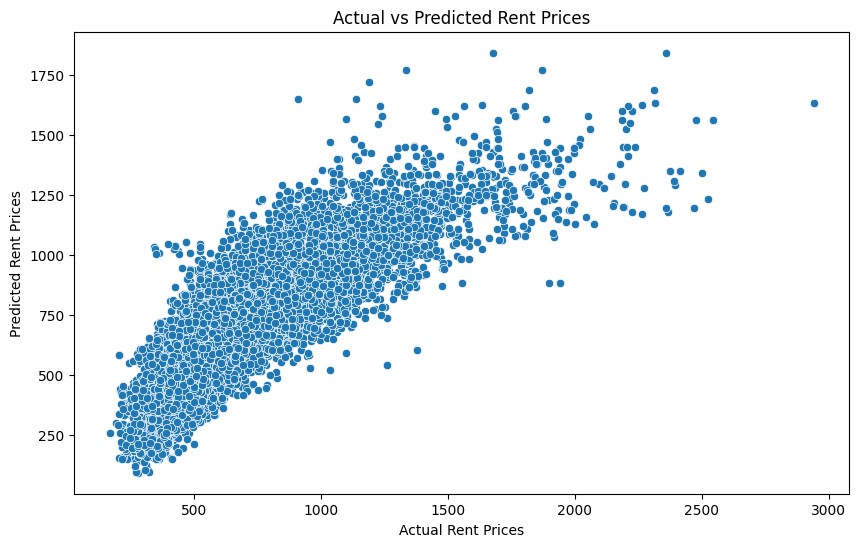

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")
plt.title("Actual vs Predicted Rent Prices")
plt.show()


## 🍁 **Observation Summary and Analysis of Results** 🍁

Based on the extracted results from the regression notebook, here are the performance metrics and key insights for the **Linear Regression** model.

---

### **Regression Model Evaluation Results**
1. **Mean Absolute Error (MAE):** **125.73**
   - This means, on average, the model’s predictions are off by about **$125.73** in rent prices.
  
2. **Mean Squared Error (MSE):** **28,167.25**
   - A higher value indicates some large deviations in rent predictions.
  
3. **Root Mean Squared Error (RMSE):** **167.83**
   - The model's average prediction error is **$167.83** in rent prices.
  
4. **R² Score:** **0.697**
   - The model explains **69.7%** of the variance in rental prices.

---

### **Key Observations**
- The **R² score of 69.7%** suggests that the model does a fairly good job at predicting rent prices but leaves room for improvement.
- The **RMSE of $167.83** indicates that rental price predictions can vary significantly, which may be due to missing factors like economic conditions or additional attributes related to properties such as specific features and amenities for the structures and specific locations.
- The model relies on province, city, year, and unit type but is not able to account for external variables such as inflation, population growth, demand trends, geopolitical effects, and others) that could futher affect accuracy.
